In [1]:
from random import randint
import json
import pandas as pd
from datetime import datetime

## Data Generator

In [2]:
# Gnerating Date Renewal Date
day =[]
month =[]
year = []

for i in range(10000):
    year.append(randint(2001,2021))
    month.append(randint(1,12))
    if(month[i]!=2):
        day.append(randint(1,31))
    elif(year[i]%4==0):
        day.append(randint(1,29))
    else:
        day.append(randint(1,28))

#Generating License plate
license_num = []
state = ['AN','AP','AR','AS','BR','CH','DN','DD','DL','GA','GJ','HR','HP','JK','KA','KL','LD','MP','MH','MN','ML','MZ','NL','OR','PY','PN','RJ','SK','TN','TR','UP','WB']
num_st = []
for i in range(10000):
    num_st.append(state[randint(0,31)])
    num_st[i] += " "
    num_st[i] += str(randint(0,9))
    num_st[i] += str(randint(0,9))
    num_st[i] += " "
    num_st[i] += chr(randint(65,90))
    if(randint(0,1)==0):
        num_st[i] += chr(randint(65,90))
    num_st[i] += " "
    num_st[i] += str(randint(0,9))
    num_st[i] += str(randint(0,9))
    num_st[i] += str(randint(0,9))
    num_st[i] += str(randint(0,9))

#Generating license plate owner names
name =[]
for i in range(10000):
    name.append('')
    for j in range(5):
        name[i] += chr(randint(65,90))
        
#Generating Insurance Renewal Date
iday =[]
imonth =[]
iyear = []

for i in range(10000):
    iyear.append(randint(2001,2021))
    imonth.append(randint(1,12))
    if(imonth[i]!=2):
        iday.append(randint(1,31))
    elif(iyear[i]%4==0):
        iday.append(randint(1,29))
    else:
        iday.append(randint(1,28))

validity = 20 #years

data = {}
data.update({'Licnum':num_st,'Name':name,'LicPreday':day,'LicPreMon':month,'LicPreYear':year,'LicExpStatus':[" " for x in range(len(year))],
            'InsPreday':iday, 'InsPreMon':imonth, 'InsPreYear':iyear, 'InsExpStatus':[" " for x in range(len(iyear))]})
  
f = open('Data.json','w')        
f.write(json.dumps(data))   
f.close() 

## Read Dict and DataFrame from JSON file 

In [8]:
with open('Data.json' ,'r') as file:
            jdata = json.loads(file.read()) 

In [9]:
data = pd.read_json('Data.json')

## Updating the License Expiry status

In [5]:
for i in range(len(jdata['Licnum'])):
    jdata['LicExpStatus'][i] = 'Valid'

validity = 20 #year

year = int(str(datetime.now())[:4])
mon = int(str(datetime.now())[5:7])
day = int(str(datetime.now())[8:10])

dyear = data[data['LicPreYear']<=year-validity]
dmon = dyear[dyear['LicPreMon']<=mon]
dday = dmon[dmon['LicPreday']<=day]

licnum = list(dday['Licnum'])

for i in licnum:
    if i in jdata['Licnum']:
        jdata['LicExpStatus'][jdata['Licnum'].index(i)] = 'Expired'


## Updating the Insurance Expiry status

In [6]:
for i in range(len(jdata['Licnum'])):
    jdata['InsExpStatus'][i] = 'Valid'

validity = 20

year = int(str(datetime.now())[:4])
mon = int(str(datetime.now())[5:7])
day = int(str(datetime.now())[8:10])

dyear = data[data['InsPreYear']<=year-validity]
dmon = dyear[dyear['InsPreMon']<=mon]
dday = dmon[dmon['InsPreday']<=day]

licnum = list(dday['Licnum'])

for i in licnum:
    if i in jdata['Licnum']:
        jdata['InsExpStatus'][jdata['Licnum'].index(i)] = 'Expired'

## Writing the updated IES and LES in the json file

In [7]:
f = open('Data.json','w')        
f.write(json.dumps(jdata))   
f.close()

## Data Analytics of registered car vs year

In [10]:
data.head()

,Licnum,Name,LicPreday,LicPreMon,LicPreYear,LicExpStatus,InsPreday,InsPreMon,InsPreYear,InsExpStatus
0,ML 83 JC 2554,HNVCE,22,8,2001,Expired,3,8,2014,Valid
1,DL 72 EW 7770,CPSYI,14,4,2001,Expired,24,7,2012,Valid
2,WB 09 KS 2699,POTBC,27,9,2020,Valid,10,2,2014,Valid
3,UP 24 W 0443,KMOTB,1,4,2001,Expired,18,10,2019,Valid
4,MH 06 P 5537,RCCBW,6,10,2008,Valid,31,4,2013,Valid


<AxesSubplot:xlabel='Year'>

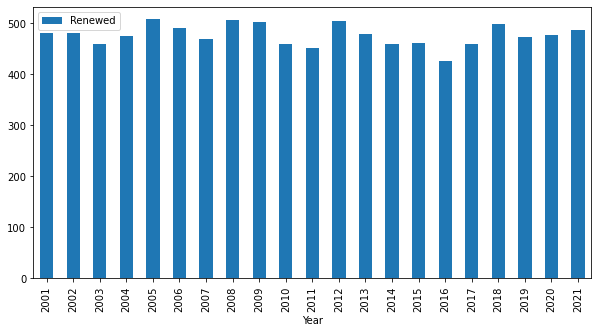

In [9]:
years = data['LicPreYear'].sort_values().unique()
dt = []
for i in years:
    dt.append([i,len(data[data['LicPreYear'] == i])])
dt = pd.DataFrame(dt,columns=['Year','Renewed'])
dt.plot(x = 'Year',y = 'Renewed',kind = 'bar',figsize = (10,5))

## License expiry vehichle's details

In [10]:
data['LicPreYear'].sort_values().unique()

array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
      dtype=int64)

In [11]:
l = [x for x in jdata['Licnum'] if(jdata['LicExpStatus'][jdata['Licnum'].index(x)]=='Expired')]
print(l)

['TN 44 LF 1794', 'UP 89 LV 4586', 'UP 50 S 6663', 'KL 72 VY 2206', 'TN 10 TM 1325', 'OR 04 W 2827', 'HR 33 X 7838', 'AR 52 U 9222', 'TN 25 KM 5869', 'AP 14 G 1746', 'AN 05 U 0613', 'KL 24 V 8822', 'AN 16 AE 8146', 'LD 79 AG 8676', 'OR 65 K 0171', 'PN 98 N 3480', 'UP 91 KF 3979', 'BR 60 X 1341', 'JK 75 MY 8546', 'GJ 21 H 3244', 'TR 88 L 4590', 'UP 98 E 5729', 'DN 28 QI 2132', 'JK 60 UC 9841', 'PY 82 ID 6967', 'CH 35 JN 0820', 'DN 01 DN 2308', 'KL 06 E 9027', 'AS 38 RC 4654', 'AS 42 BN 4740', 'WB 04 QR 6897', 'TR 98 F 8435', 'WB 57 VL 5704', 'TN 62 C 2786', 'PY 79 S 7747', 'BR 69 TM 3173', 'HP 99 DE 3962', 'GA 49 AQ 2153', 'DN 76 R 2925', 'DN 12 C 5922', 'DL 99 ZK 5531', 'ML 41 S 9907', 'GJ 72 B 6129', 'JK 58 W 5960', 'GA 17 ER 5543', 'PY 69 S 5787', 'TR 27 S 4041', 'MP 84 Z 9544', 'AS 05 H 3816', 'MH 83 J 1666', 'CH 10 YU 1962', 'RJ 64 HE 5519', 'KL 01 I 7055', 'DL 12 U 6864', 'TR 17 OD 2009', 'GA 40 Z 4994', 'RJ 50 V 4906', 'PN 46 LA 8779', 'TR 26 D 7630', 'UP 74 T 6163', 'DL 34 A 475

In [12]:
len(l)

353

In [15]:
data[data['LicExpStatus']=='Expired']

,Licnum,Name,LicPreday,LicPreMon,LicPreYear,LicExpStatus,InsPreday,InsPreMon,InsPreYear,InsExpStatus
0,TN 44 LF 1794,LKELW,2,7,2001,Expired,18,3,2019,Valid
38,UP 89 LV 4586,XYFWR,14,4,2001,Expired,25,4,2014,Valid
43,UP 50 S 6663,LKVNG,3,1,2001,Expired,30,7,2013,Valid
70,KL 72 VY 2206,RQYCP,16,6,2001,Expired,17,6,2013,Valid
113,TN 10 TM 1325,OYIBG,15,5,2001,Expired,25,5,2018,Valid
...,...,...,...,...,...,...,...,...,...,...
9930,TN 25 N 9971,DQZKJ,20,4,2001,Expired,7,6,2005,Valid
9945,MN 94 M 1483,POETZ,13,9,2001,Expired,17,2,2016,Valid
9973,BR 55 KP 2456,QXDAO,25,3,2001,Expired,5,11,2013,Valid
9984,WB 58 C 8167,MIWRO,14,6,2001,Expired,16,6,2005,Valid


## Insurance expiry vehichle's details

In [16]:
data['LicPreYear'].sort_values().unique()

array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
      dtype=int64)

<AxesSubplot:xlabel='Year'>

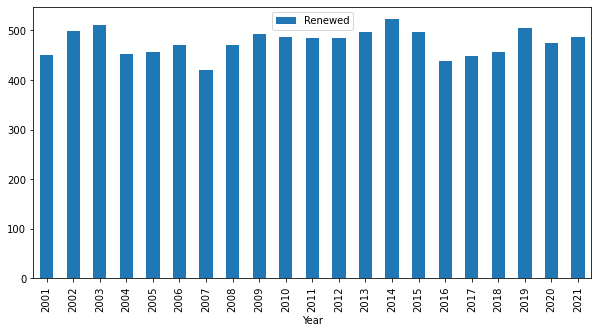

In [12]:
years = data['InsPreYear'].sort_values().unique()
dt = []
for i in years:
    dt.append([i,len(data[data['InsPreYear'] == i])])
dt = pd.DataFrame(dt,columns=['Year','Renewed'])
dt.plot(x = 'Year',y = 'Renewed',kind = 'bar',figsize = (10,5))

In [17]:
i = [x for x in jdata['Licnum'] if(jdata['InsExpStatus'][jdata['Licnum'].index(x)]=='Expired')]
print("Number of vehichles: ",len(i),"\n",i)

Number of vehichles:  347 
 ['DN 18 X 2382', 'HP 11 LG 3445', 'OR 81 VV 1927', 'OR 70 GK 1078', 'TN 14 E 4657', 'MZ 11 PP 6971', 'UP 38 HP 3745', 'MP 21 SV 1568', 'BR 91 OG 4081', 'HP 57 N 7043', 'NL 97 MU 8222', 'AP 71 D 5165', 'PN 54 W 0375', 'DN 80 WS 4175', 'NL 34 P 1896', 'KA 55 BD 9869', 'AN 71 O 9611', 'GA 18 HN 2316', 'RJ 48 F 1750', 'MH 21 GZ 0502', 'KL 96 ZD 4913', 'BR 44 T 9224', 'MN 06 DO 5756', 'HR 68 E 5228', 'LD 76 GP 7242', 'WB 19 CX 2409', 'LD 71 ON 6427', 'RJ 42 JA 6013', 'SK 46 E 8680', 'AP 08 Q 8574', 'BR 60 X 1341', 'PY 71 G 8685', 'MZ 95 K 9047', 'OR 38 V 7502', 'AP 20 TP 7554', 'LD 03 C 6190', 'BR 15 SL 1023', 'MN 66 QW 4646', 'MP 62 QO 4427', 'RJ 79 ML 2996', 'MZ 94 I 3832', 'DL 82 TU 5392', 'HR 87 SV 1414', 'AR 70 JH 6320', 'PN 94 I 9354', 'RJ 00 QT 4986', 'NL 80 R 5067', 'GJ 79 UO 7022', 'GJ 11 G 8202', 'NL 85 LG 4878', 'GJ 87 N 0483', 'MH 93 IG 5358', 'NL 27 K 9013', 'AR 28 EI 4381', 'NL 21 HP 6378', 'MH 20 R 7578', 'KL 03 OB 4532', 'GA 49 FE 4052', 'AR 70 R 

In [18]:
data[data['InsExpStatus']=='Expired']

,Licnum,Name,LicPreday,LicPreMon,LicPreYear,LicExpStatus,InsPreday,InsPreMon,InsPreYear,InsExpStatus
17,DN 18 X 2382,YMRRZ,26,5,2009,Valid,16,5,2001,Expired
24,HP 11 LG 3445,GSFKU,20,10,2019,Valid,25,9,2001,Expired
34,OR 81 VV 1927,JTNUY,3,12,2005,Valid,10,9,2001,Expired
39,OR 70 GK 1078,HPKWA,22,8,2018,Valid,22,3,2001,Expired
67,TN 14 E 4657,XPIPW,3,11,2012,Valid,10,7,2001,Expired
...,...,...,...,...,...,...,...,...,...,...
9847,SK 94 GO 4952,NGNZR,18,1,2021,Valid,18,4,2001,Expired
9886,TN 47 QK 0396,HATCF,18,1,2002,Valid,13,2,2001,Expired
9887,AS 61 Z 8183,MCXVO,31,12,2012,Valid,14,7,2001,Expired
9892,DL 60 K 9203,QBKAV,14,9,2001,Expired,13,8,2001,Expired


In [19]:
jdata.keys()

dict_keys(['Licnum', 'Name', 'LicPreday', 'LicPreMon', 'LicPreYear', 'LicExpStatus', 'InsPreday', 'InsPreMon', 'InsPreYear', 'InsExpStatus'])